In [1]:
import pandas as pd
from numpy import arange,mean
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from sklearn.linear_model import LinearRegression
from sklearn.base import RegressorMixin
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_line_chart,HEIGHT,ts_aggregation_by, series_train_test_split, plot_forecasting_eval, plot_forecasting_series

In [2]:
eval_models = False

In [3]:
file_tag = "forecast_covid"
filename = "datasets/forecast_covid_single.csv"
index = "date"
target = "deaths"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

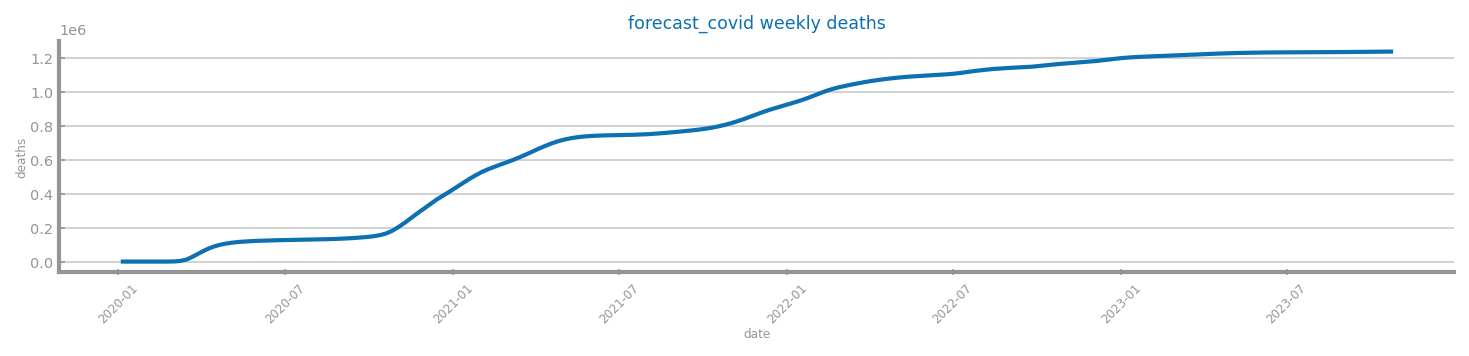

In [4]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

#dont uncomment this, its just an example of the savefig, since the teacher doesn't save the pics this time
#savefig(f"images/forecast/{file_tag}_data_transformation_aggregation_<whatever-you-doing-in-this-step>", bbox_inches="tight")
show()

# Aggregation

In [5]:
ss_agg_w: DataFrame = ts_aggregation_by(data, gran_level="W", agg_func="sum")
ss_agg_m: DataFrame = ts_aggregation_by(data, gran_level="M", agg_func="sum")
ss_agg_q: DataFrame = ts_aggregation_by(data, gran_level="Q", agg_func="sum")
datas = [ss_agg_w,ss_agg_m,ss_agg_q]
names = ["week","month","quarter"]

In [6]:
if eval_models:
    for dataframe, name in zip(datas, names):
        train, test = series_train_test_split(dataframe, trn_pct=0.90)
    
        trnX = arange(len(train)).reshape(-1, 1)
        trnY = train.to_numpy()
        tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
        tstY = test.to_numpy()
    
        model = LinearRegression()
        model.fit(trnX, trnY)
    
        prd_trn: Series = Series(model.predict(trnX), index=train.index)
        prd_tst: Series = Series(model.predict(tstX), index=test.index)
        
        plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} aggregation - Linear Regression")
        savefig(f"images/forecast/{file_tag}_{name}_data_transformation_aggregation_linear_regression_eval.png")

In [7]:
if eval_models:
    for dataframe, name in zip(datas, names):
        train, test = series_train_test_split(dataframe, trn_pct=0.90)
    
        trnX = arange(len(train)).reshape(-1, 1)
        trnY = train.to_numpy()
        tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
        tstY = test.to_numpy()
    
        model = LinearRegression()
        model.fit(trnX, trnY)
    
        prd_trn: Series = Series(model.predict(trnX), index=train.index)
        prd_tst: Series = Series(model.predict(tstX), index=test.index)
        plot_forecasting_series(
            train,
            test,
            prd_tst,
            title=f"{file_tag}_{name} aggregation - Linear Regression",
            xlabel=series.index.name,
            ylabel=target,
        )
        savefig(f"images/forecast/{file_tag}_{name}_data_transformation_aggregation_linear_regression_forecast.png")

## Selecting Best

Its week

In [8]:
data = ss_agg_w
if eval_models:
    train, test = series_train_test_split(data, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()
    
    model = LinearRegression()
    model.fit(trnX, trnY)
    
    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_best aggregation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_best_data_transformation_aggregation_linear_regression_forecast.png")
    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_best aggregation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_best_data_transformation_aggregation_linear_regression_eval.png")

# Smoothing

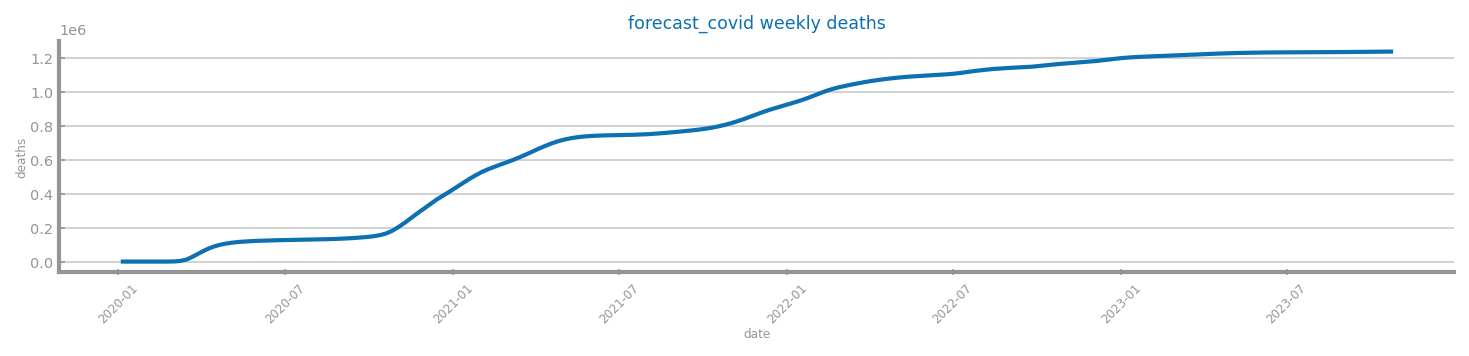

In [9]:
train, test = series_train_test_split(data, trn_pct=0.90)

ss_smooth_5 : DataFrame = train.rolling(window=5).mean()
ss_smooth_10 : DataFrame = train.rolling(window=10).mean()
ss_smooth_25 : DataFrame = train.rolling(window=25).mean()
ss_smooth_50 : DataFrame = train.rolling(window=50).mean()
ss_smooth_5 = ss_smooth_5.dropna()
ss_smooth_10 = ss_smooth_10.dropna()
ss_smooth_25 = ss_smooth_25.dropna()
ss_smooth_50 = ss_smooth_50.dropna()
common_index = ss_smooth_5.index.intersection(ss_smooth_50.index)
ss_smooth_5 = ss_smooth_5.loc[common_index]
ss_smooth_10 = ss_smooth_10.loc[common_index]
ss_smooth_25 = ss_smooth_25.loc[common_index]
ss_smooth_50 = ss_smooth_50.loc[common_index]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

datas = [data, pd.concat([ss_smooth_5, test], axis=0).to_frame(name=target), pd.concat([ss_smooth_10, test], axis=0).to_frame(name=target), pd.concat([ss_smooth_25, test], axis=0).to_frame(name=target), pd.concat([ss_smooth_50, test], axis=0).to_frame(name=target)]

names = ["1","5","10","25","50"]
#dont uncomment this, its just an example of the savefig, since the teacher doesn't save the pics this time
#savefig(f"images/forecast/{file_tag}_data_transformation_aggregation_<whatever-you-doing-in-this-step>", bbox_inches="tight")
show()

In [10]:
ss_smooth_5.shape

(130,)

In [11]:
if eval_models:
    for dataframe, name in zip(datas, names):
        train, test = series_train_test_split(dataframe, trn_pct=0.90)
        trnX = arange(len(train)).reshape(-1, 1)
        trnY = train.to_numpy()
        tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
        tstY = test.to_numpy()
    
        model = LinearRegression()
        model.fit(trnX, trnY)
    
        prd_trn: Series = Series(model.predict(trnX), index=train.index)
        prd_tst: Series = Series(model.predict(tstX), index=test.index)
    
        plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} smoothing - Linear Regression")
        savefig(f"images/forecast/{file_tag}_{name}_data_transformation_smoothing_linear_regression_eval.png")

In [12]:
if eval_models:
    for dataframe, name in zip(datas, names):
        train, test = series_train_test_split(dataframe, trn_pct=0.90)
        trnX = arange(len(train)).reshape(-1, 1)
        trnY = train.to_numpy()
        tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
        tstY = test.to_numpy()
    
        model = LinearRegression()
        model.fit(trnX, trnY)
    
        prd_trn: Series = Series(model.predict(trnX), index=train.index)
        prd_tst: Series = Series(model.predict(tstX), index=test.index)
        plot_forecasting_series(
            train,
            test,
            prd_tst,
            title=f"{file_tag}_{name} smoothing - Linear Regression",
            xlabel=series.index.name,
            ylabel=target,
        )
        savefig(f"images/forecast/{file_tag}_{name}_data_transformation_smoothing_linear_regression_forecast.png")

## Selecting best

Smoothing with window size of 5

In [13]:
data = datas[1]
if eval_models:
    train, test = series_train_test_split(data, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()
    
    model = LinearRegression()
    model.fit(trnX, trnY)
    
    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_best smoothing - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_best_data_transformation_smoothing_linear_regression_forecast.png")
    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_best smoothing - Linear Regression")
    savefig(f"images/forecast/{file_tag}_best_data_transformation_smoothing_linear_regression_eval.png")

# Differentiation

In [14]:
ss_diff_0 : DataFrame = data
ss_diff : DataFrame = data.diff()
ss_diff_2 : DataFrame = ss_diff.diff()
ss_diff = ss_diff.dropna()
ss_diff_2 = ss_diff_2.dropna()
common_index = ss_diff_2.index.intersection(ss_diff_0.index)
ss_diff_0 = ss_diff_0.loc[common_index]
ss_diff = ss_diff.loc[common_index]
datas = [ss_diff_0,ss_diff,ss_diff_2]
names = ["0","1","2"]

In [15]:
if eval_models:
    for dataframe, name in zip(datas, names):
        train, test = series_train_test_split(dataframe, trn_pct=0.90)
        trnX = arange(len(train)).reshape(-1, 1)
        trnY = train.to_numpy()
        tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
        tstY = test.to_numpy()
    
        model = LinearRegression()
        model.fit(trnX, trnY)
    
        prd_trn: Series = Series(model.predict(trnX), index=train.index)
        prd_tst: Series = Series(model.predict(tstX), index=test.index)
    
        plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} differenciation - Linear Regression")
        savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_eval.png")

In [16]:
if eval_models:
    for dataframe, name in zip(datas, names):
        train, test = series_train_test_split(dataframe, trn_pct=0.90)
        trnX = arange(len(train)).reshape(-1, 1)
        trnY = train.to_numpy()
        tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
        tstY = test.to_numpy()

        model = LinearRegression()
        model.fit(trnX, trnY)

        prd_trn: Series = Series(model.predict(trnX), index=train.index)
        prd_tst: Series = Series(model.predict(tstX), index=test.index)
        plot_forecasting_series(
            train,
            test,
            prd_tst,
            title=f"{file_tag}_{name} differentiation - Linear Regression",
            xlabel=series.index.name,
            ylabel=target,
        )
        savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_forecast.png")

# Selecting best
The non diff one

In [17]:
data = ss_diff_0
if eval_models:
    train, test = series_train_test_split(data, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()
    
    model = LinearRegression()
    model.fit(trnX, trnY)
    
    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_best differentiation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_best_data_transformation_differentiation_linear_regression_forecast.png")
    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_best differentiation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_best_data_transformation_differentiation_linear_regression_eval.png")

# Saving Data

In [18]:
data.to_csv("datasets/forecasting_covid_transformed.csv")

## Rolling Mean

In [17]:
class RollingMeanRegressor(RegressorMixin):
    def __init__(self, win: int = 3):
        super().__init__()
        self.win_size = win
        self.memory: list = []

    def fit(self, X: Series):
        self.memory = X.iloc[-self.win_size :]
        # print(self.memory)
        return

    def predict(self, X: Series):
        estimations = self.memory.tolist()
        for i in range(len(X)):
            new_value = mean(estimations[len(estimations) - self.win_size - i :])
            estimations.append(new_value)
        prd_series: Series = Series(estimations[self.win_size :])
        prd_series.index = X.index
        return prd_series


def rolling_mean_study(train: Series, test: Series, measure: str = "R2"):
    win_size = (3, 5, 10, 15, 20, 25, 30, 40, 50)
    # win_size = (12, 24, 48, 96, 192, 384, 768)
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "Rolling Mean", "metric": measure, "params": ()}
    best_performance: float = -100000

    yvalues = []
    for w in win_size:
        pred = RollingMeanRegressor(win=w)
        pred.fit(train)
        prd_tst = pred.predict(test)

        eval: float = FORECAST_MEASURES[measure](test, prd_tst)
        # print(w, eval)
        if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["params"] = (w,)
            best_model = pred
        yvalues.append(eval)

    print(f"Rolling Mean best with win={best_params['params'][0]:.0f} -> {measure}={best_performance}")
    plot_line_chart(
        win_size, yvalues, title=f"Rolling Mean ({measure})", xlabel="window size", ylabel=measure
    )
    return best_model, best_params

Rolling Mean best with win=3 -> R2=-2.2950791576589067


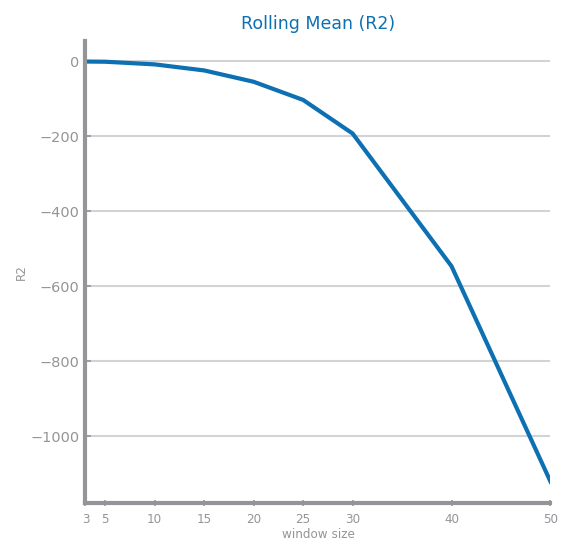

In [18]:
measure: str = "R2"
train, test = series_train_test_split(data, trn_pct=0.90)

fig = figure(figsize=(HEIGHT, HEIGHT))
best_model, best_params = rolling_mean_study(train, test)
savefig(f"images/forecast/{file_tag}_rollingmean_{measure}_study.png")

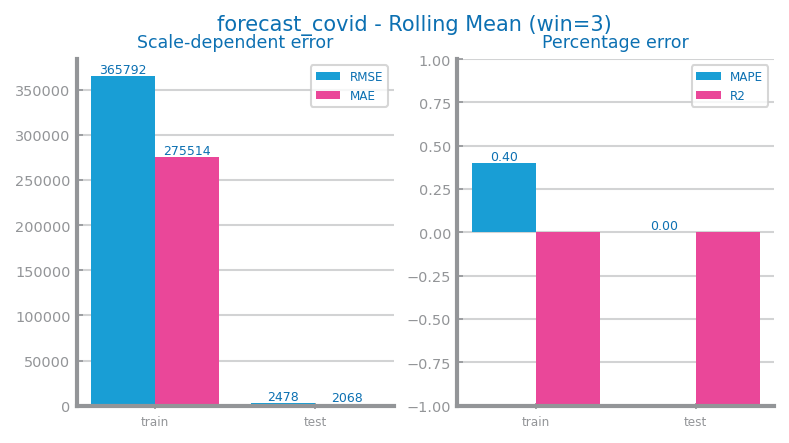

In [19]:
params = best_params["params"]
prd_trn: Series = best_model.predict(train)
prd_tst: Series = best_model.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Rolling Mean (win={params[0]})")
savefig(f"images/forecast/{file_tag}_rollingmean_{measure}_win{params[0]}_eval.png")

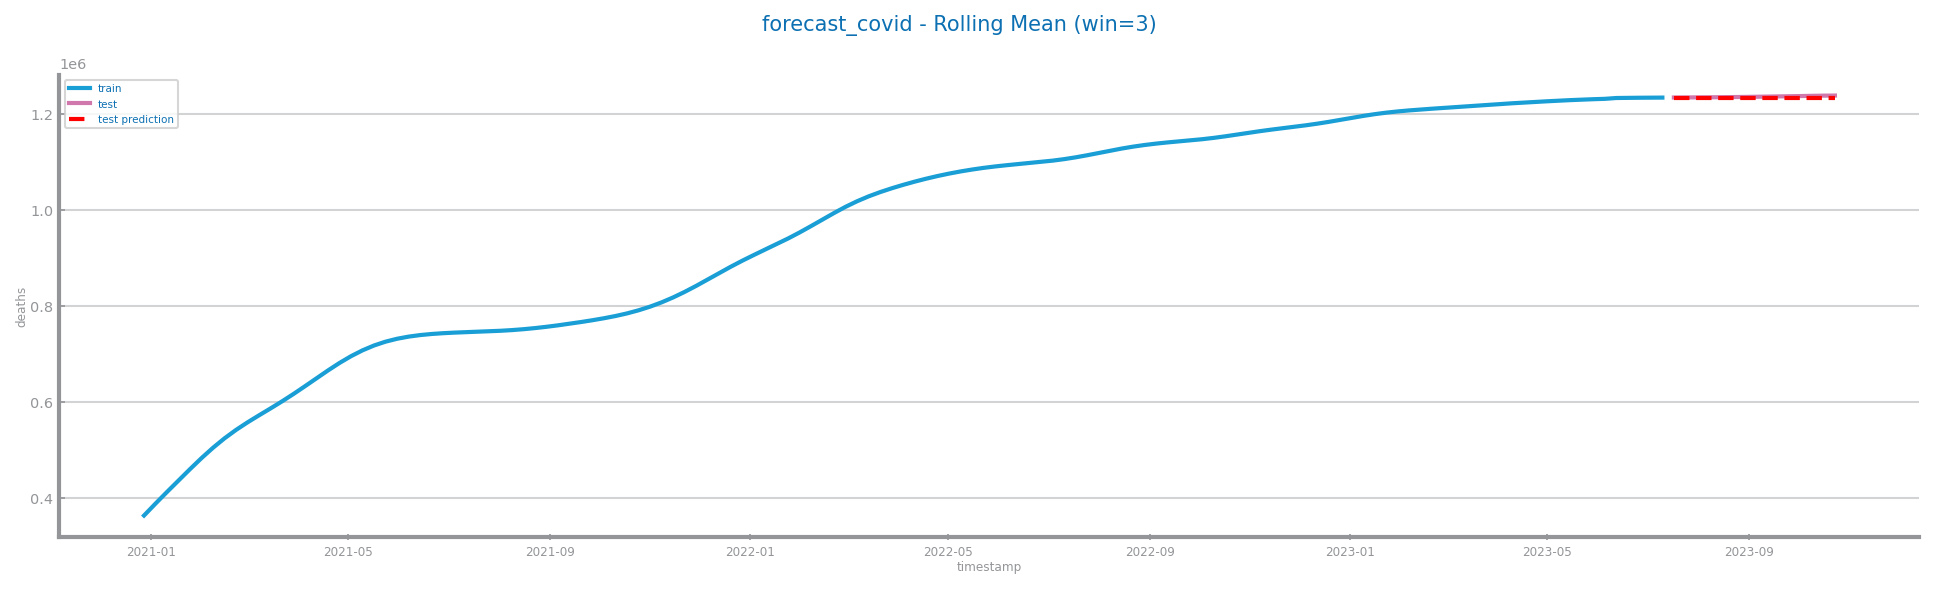

In [20]:
timecol: str = "timestamp"
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Rolling Mean (win={params[0]})",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_rollingmean_{measure}_forecast.png")

## Simple Average

In [21]:
class SimpleAvgRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean: float = 0.0
        return

    def fit(self, X: Series):
        self.mean = X.mean()
        return

    def predict(self, X: Series) -> Series:
        prd: list = len(X) * [self.mean]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

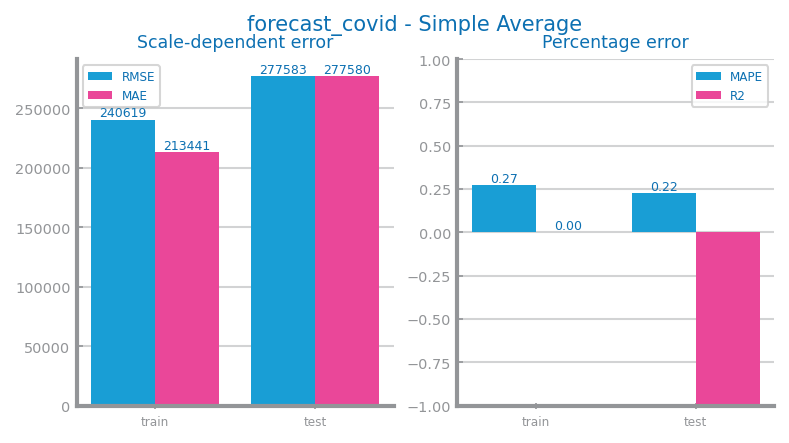

In [22]:
train, test = series_train_test_split(data, trn_pct=0.90)

fr_mod = SimpleAvgRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Simple Average")
savefig(f"images/forecast/{file_tag}_simpleAvg_eval.png")

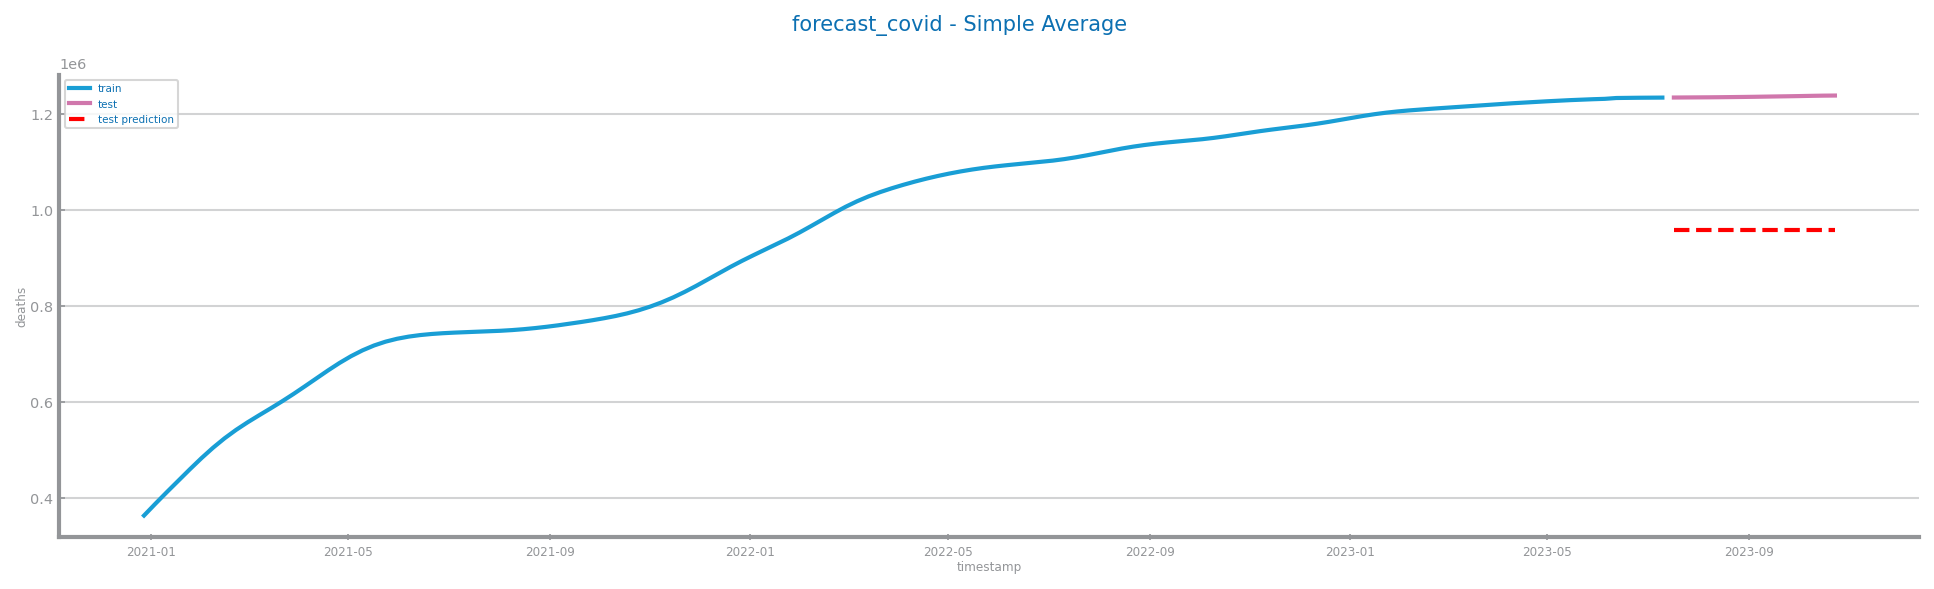

In [23]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Simple Average",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_simpleAvg_forecast.png")

## Persistence 

In [24]:
class PersistenceOptimistRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last: float = 0.0
        return

    def fit(self, X: Series):
        self.last = X.iloc[-1]
        # print(self.last)
        return

    def predict(self, X: Series):
        prd: list = X.shift().values.ravel()
        prd[0] = self.last
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

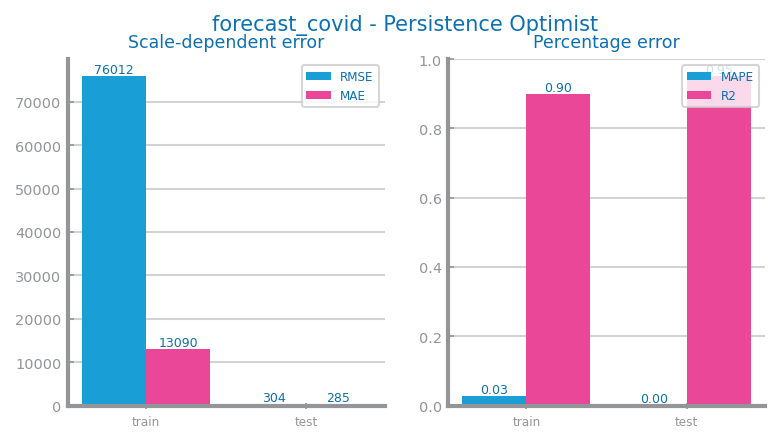

In [25]:
train, test = series_train_test_split(data, trn_pct=0.90)

fr_mod = PersistenceOptimistRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Persistence Optimist")
savefig(f"images/forecast/{file_tag}_persistence_optim_eval.png")

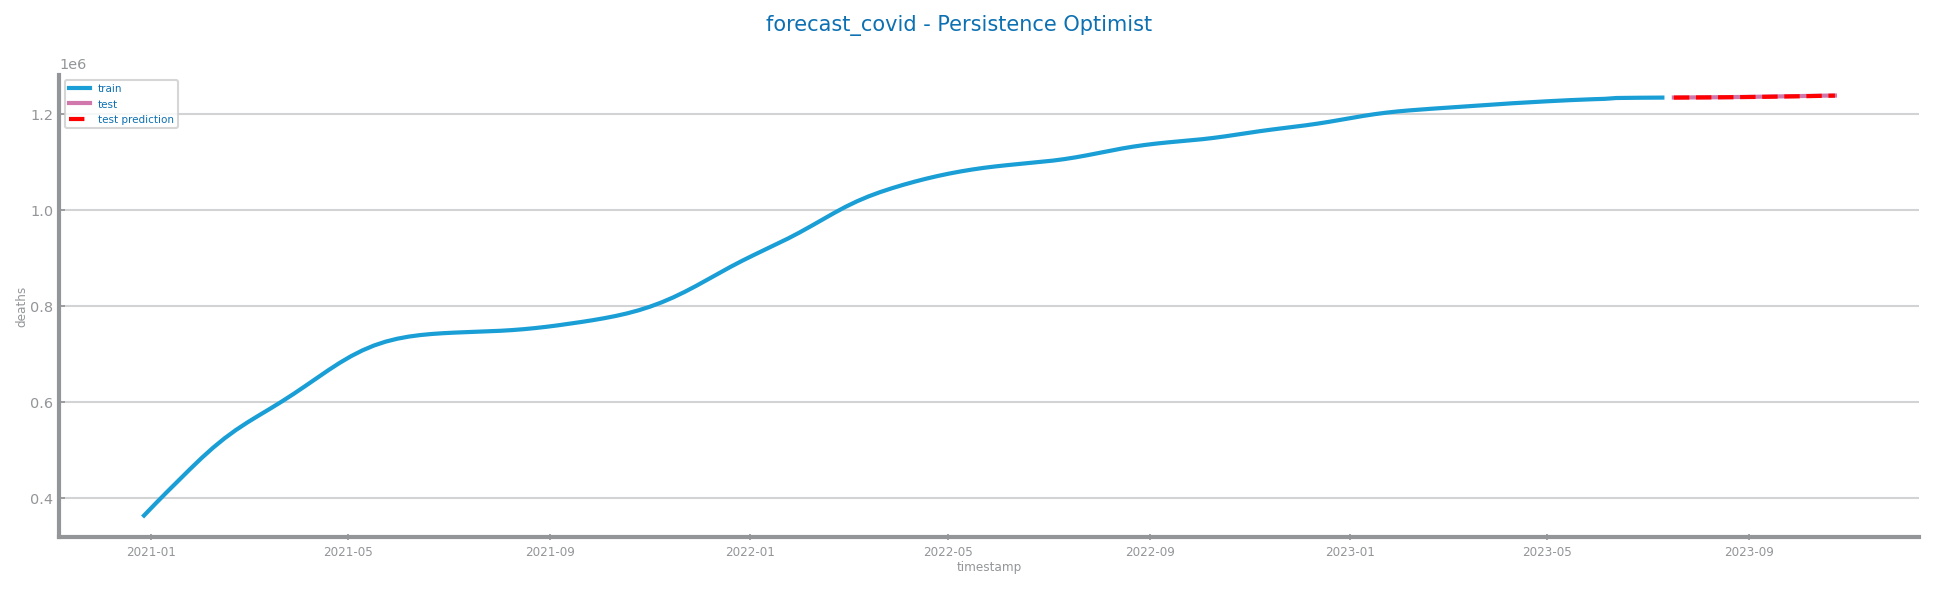

In [26]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Persistence Optimist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_persistence_optim_forecast.png")

In [27]:
class PersistenceRealistRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.last = 0
        self.estimations = [0]
        self.obs_len = 0

    def fit(self, X: Series):
        for i in range(1, len(X)):
            self.estimations.append(X.iloc[i - 1])
        self.obs_len = len(self.estimations)
        self.last = X.iloc[len(X) - 1]
        prd_series: Series = Series(self.estimations)
        prd_series.index = X.index
        return prd_series

    def predict(self, X: Series):
        prd: list = len(X) * [self.last]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

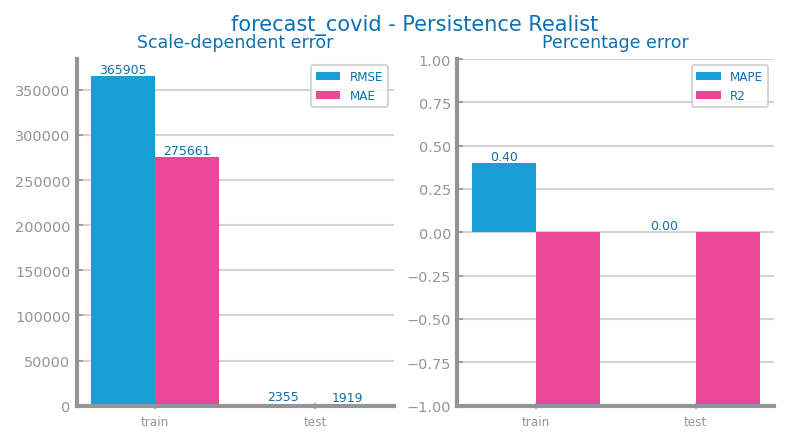

In [28]:
train, test = series_train_test_split(data, trn_pct=0.90)

fr_mod = PersistenceRealistRegressor()
fr_mod.fit(train)
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Persistence Realist")
savefig(f"images/forecast/{file_tag}_persistence_real_eval.png")

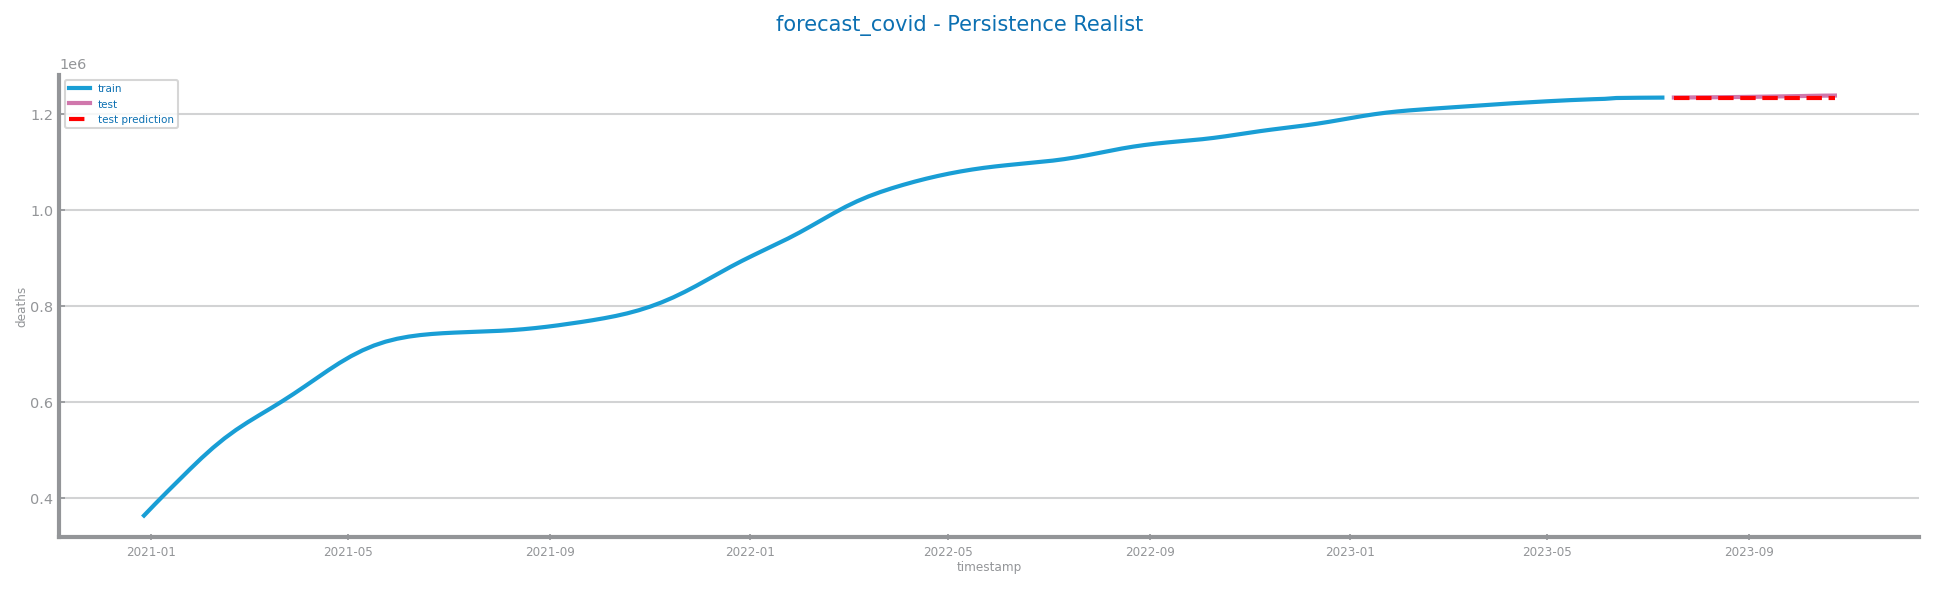

In [29]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/forecast/{file_tag}_persistence_real_forecast.png")